In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# DATA PREPERATION
# Read CSV file into Pandas Dataframe
crypto_df = pd.read_csv('crypto_data.csv')
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [3]:
crypto_df.shape

(1252, 7)

In [4]:
# Discard non-trading currencies
crypto_df = crypto_df[crypto_df.IsTrading !=False]
crypto_df.shape

(1144, 7)

In [5]:
# Remove rows with null values
for column in crypto_df.columns:
    print(f"Column {column} has {crypto_df[column].isnull().sum()} null values")

Column Unnamed: 0 has 0 null values
Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 459 null values
Column TotalCoinSupply has 0 null values


In [6]:
crypto_df = crypto_df.dropna()
crypto_df.shape

(685, 7)

In [7]:
# Filter for mined currencies
crypto_df = crypto_df[crypto_df.TotalCoinsMined >0]
crypto_df.shape

(532, 7)

In [8]:
# Delete columns with no contribution to analysis
crypto_df.drop(columns=['CoinName','Unnamed: 0', 'IsTrading'], inplace=True)
crypto_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,Scrypt,PoW/PoS,4.199995e+01,42
2,Scrypt,PoW/PoS,1.055185e+09,532000000
5,X13,PoW/PoS,2.927942e+10,314159265359
7,SHA-256,PoW,1.792718e+07,21000000
8,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
1238,SHA-256,DPoS,2.000000e+09,2000000000
1242,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,CryptoNight,PoW,9.802226e+08,1400222610
1246,Equihash,PoW,7.296538e+06,21000000


In [9]:
# Check for duplicates
print(f"Duplicate entries: {crypto_df.duplicated().sum()}")

Duplicate entries: 1


In [10]:
# Delete duplicates
crypto_df.drop_duplicates(keep='first', inplace=True)
crypto_df.shape

(531, 4)

In [11]:
# Convert remaining text features to numberical values
crypto_df = pd.get_dummies(crypto_df, columns=['Algorithm', 'ProofType'])
print(crypto_df.columns)
crypto_df

Index(['TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_1GB AES Pattern Search', 'Algorithm_536',
       'Algorithm_Argon2d', 'Algorithm_BLAKE256', 'Algorithm_Blake',
       'Algorithm_Blake2S', 'Algorithm_Blake2b', 'Algorithm_C11',
       'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algor

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,250000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Standardise columns with larger values
scaler = StandardScaler()
scaled_data = scaler.fit_transform(crypto_df[['TotalCoinsMined', 'TotalCoinSupply']])
scaled_data.shape

(531, 2)

In [13]:
scaled_data = pd.DataFrame(scaled_data, columns=['TotalCoinsMined', 'TotalCoinSupply'])
scaled_data

,TotalCoinsMined,TotalCoinSupply
0,-0.117219,-0.153017
1,-0.094102,-0.145163
2,0.524239,4.485014
3,-0.116826,-0.152707
4,-0.114860,-0.153017
...,...,...
526,-0.073403,-0.123490
527,-0.116892,-0.149326
528,-0.095744,-0.132345
529,-0.117059,-0.152707


In [14]:
crypto_df.drop(columns=['TotalCoinsMined', 'TotalCoinSupply'], inplace=True)
crypto_df.reset_index(inplace=True, drop = True)
crypto_df

,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
527,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
528,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
529,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
new_crypto_data = pd.merge(scaled_data, crypto_df, left_index=True, right_index=True)
new_crypto_data.head()

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,-0.117219,-0.153017,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,-0.094102,-0.145163,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0.524239,4.485014,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,-0.116826,-0.152707,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.114860,-0.153017,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# DIMENSIONALITY REDUCTION
pca = PCA(n_components=4)
crypto_pca = pca.fit_transform(new_crypto_data) 

In [17]:
# Create PCA model
crypto_pca_df = pd.DataFrame(data=crypto_pca, columns=["pc 1", "pc 2", "pc 3", "pc 4"])
crypto_pca_df.head()

,pc 1,pc 2,pc 3,pc 4
0,-0.209590,-0.803193,0.169893,-0.669736
1,-0.187724,-0.805671,0.159477,-0.670336
2,3.526009,-0.310108,2.913123,0.412096
3,-0.180390,0.694167,-0.164828,0.247650
4,-0.173502,0.688449,-0.153532,0.137454


In [18]:
# Fetch explained variance
pca.explained_variance_ratio_

array([0.4858637 , 0.11231373, 0.08454971, 0.07272582])

According to the explained variance, the first principle component contains nearly half of the orginal information and we have an apporximate total of 60% of the original information.

In [19]:
# Create PCA model with explained variance set to 90%
pca2 = PCA(n_components=.90)
crypto_pca2 = pca2.fit_transform(new_crypto_data)

In [20]:
crypto_pca2_df = pd.DataFrame(data=crypto_pca2)
crypto_pca2_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,-0.209590,-0.803193,0.169893,-0.669736,-0.041267,-0.027248,0.002775,-0.015130,-0.046484,-0.021887,0.013535,0.015410
1,-0.187724,-0.805671,0.159477,-0.670336,-0.042022,-0.027111,0.002882,-0.016121,-0.046638,-0.021970,0.013481,0.015506
2,3.526009,-0.310108,2.913123,0.412096,-0.157260,-0.259227,-0.278953,-0.166029,0.738502,0.422601,0.126545,-0.063557
3,-0.180390,0.694167,-0.164828,0.247650,-0.270601,-0.614754,0.624257,-0.013956,0.028483,0.017733,0.017880,-0.024972
4,-0.173502,0.688449,-0.153532,0.137454,-0.208630,-0.104325,-0.242135,0.002360,0.115260,-0.134883,-0.026705,-0.137203


In [21]:
# Fetch explained variance
pca2.explained_variance_ratio_

array([0.4858637 , 0.11231373, 0.08454971, 0.07272582, 0.05713353,
       0.03182348, 0.0197347 , 0.00969518, 0.00892539, 0.00814824,
       0.00752373, 0.00628462])

We see that we require 11 pca components in order to achieve 90% of the original information and a decrease of 87 from our original features.

In [22]:
# Run t-SNE
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(new_crypto_data)
tsne_features.shape

(531, 2)

T-sne has reduced the amount of features of the crypto data to 2 from 98 (a 96 reduction)

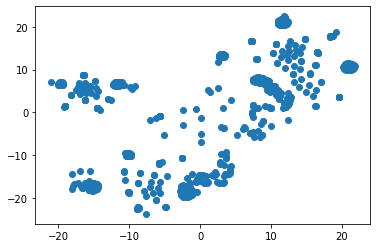

In [23]:
# Create a plot for t-SNE features
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

In [24]:
# CLUSTER ANALYSIS WITH K-MEANS
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(new_crypto_data)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.head()

C:\Users\gjeff\anaconda3\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


,k,inertia
0,1,1865.702448
1,2,1182.740473
2,3,970.099275
3,4,777.513326
4,5,664.812456


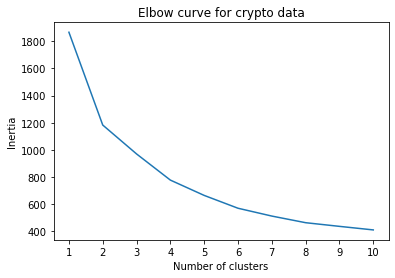

In [25]:
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve for crypto data')
plt.show()

Based on my findings I would suggest that cryptocurrencies can be grouped into 6 clusters. This is based of the t-sne plot showing vague groups of around 5 main clusters and the elbow curve plot indicating 6 to be the optimal cluster count.